<img src="assets/images/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">


# Standup & Housekeeping 

- Project lightning talks are also on **Tuesday, 1st March**: prepare 5 minutes max, present 2 ideas

- Should include a problem statement, a hypothesis, and potential data sets

- Submit slides ahead of class.

- if you're struggling for ideas, talk to us!

<img src="assets/images/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Linear Algebra and Statistics Fundamentals

---

<a id="learning-objectives"></a>
## Learning Objectives
- Create vectors and matrices (`np.array`), and compute dot products (`np.dot`), matrix multiplications, and vector norms (`np.linalg.norm`) by hand and using NumPy.
- Recognize uses of linear algebra in machine learning
 - distance between actual and predicted values
 - least squares
- Code summary statistics using NumPy and pandas: mean, median, mode, max, min, quartile, inter-quartile range, variance, standard deviation, and correlation.
- Create basic data visualizations, including scatterplots, box plots, and histograms.
- Describe characteristics and trends in a data set using visualizations.
- Describe the bias and variance of statistical estimators.
- Identify a normal distribution within a data set using summary statistics and data visualizations.


<a id="home"></a>

## Lesson Guide

---
### [Part 1: Linear Algebra](#linalg)
- [a) Linear Algebra Review](#linear-algebra-review)
    - [i) Why Use Linear Algebra in Data Science?](#why-linear-algebra)
    - [ii) Scalars, Vectors, and Matrices](#scalars-vectors-and-matrices)
	- [iii) Basic Matrix Algebra](#basic-matrix-algebra)
    - [iv) Vector Norm (aka Magnitude)](#vector-norm)
	- [v) Dot Product](#dot-product)
	- [vi) Matrix Multiplication](#matrix-multiplication)
- [b) Linear Algebra Applications to Machine Learning](#linear-algebra-applications-to-machine-learning)
	- [i) Distance Between Actual Values and Predicted Values](#distance-between-actual-values-and-predicted-values)
	- [ii) Mean Squared Error](#mean-squared-error)
	- [iii) Least Squares](#least-squares)



### [Part 2: Statistics](#stats)
- [a) CodeAlong: Examining the Titanic Data Set](#codealong-examining-the-titanic-dataset)
- [b) Descriptive Statistics Fundamentals](#descriptive-statistics-fundamentals)
    - [i) A Quick Review of Notation](#notation)
	- [ii) Measures of Central Tendency](#measures-of-central-tendency)
	- [iii) Math Review - How Do We Measure Distance?](#math-review)
	- [iv) Measures of Dispersion: Range, Variance and Standard Deviation](#measures-of-dispersion-standard-deviation-and-variance)
- [c) Our First Model](#our-first-model)
- [d) A Short Introduction to Model Bias and Variance](#a-short-introduction-to-model-bias-and-variance)
	- [i) Bias-Variance Decomposition](#bias-variance-decomposition)
	- [ii) Bessel's Correction](#example-using-bessels-correction)
- [e) Correlation and Association](#correlation-and-association)
	- [i) CodeAlong: Correlation in Pandas](#codealong-correlation-in-pandas)
- [f) The Normal Distribution](#the-normal-distribution)
	- [i) What is the Normal Distribution?](#what-is-the-normal-distribution)
	- [ii) Skewness](#skewness)
	- [iii) Kurtosis](#kurtosis)
- [g) Determining the Distribution of Your Data](#determining-the-distribution-of-your-data)
	- [i) Exercise](#exercise)
- [h) Lesson Review](#topic-review)
- [j) Additional Resources](#resources)

In [1]:
# import libraries we'll need for this notebook

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from ipywidgets import interact
plt.style.use('fivethirtyeight')

# This makes sure that graphs render in your notebook
%matplotlib inline

## <font style='color: red'>But first...</font>

### ...where are we in the Data Science Workflow?

<br />

<img src="assets/images/ds_workflow_prep_analyse.png" style="width: 700px;">

<br />



<a id="linalg"></a>
# <font style = 'color:blue'>Part 1: Linear Algebra</font>

<a id="linear-algebra-review"></a>
## <font style = 'color:blue'>a) Linear Algebra Review</font>
---
**Objective:** Compute dot products, matrix multiplications, and vector norms by hand and using NumPy.

###  <font style = 'color:red'>What *is* linear algebra?</font>

"...linear algebra is the mathematics of data. Matrices and vectors are the language of data."

*from https://machinelearningmastery.com/gentle-introduction-linear-algebra/*


<a id="why-linear-algebra"></a>
### <font style = 'color:blue'>i) Why Use Linear Algebra in Data Science?</font>

As data scientists we will often have to deal with data contained in lists or tables. 

Often we will transform data to some numerical form so that we can handle it like vectors and matrices. Doing so enables us to use the machinery of linear algebra to understand our data and to make predictions and forecasts. 


For this reason, in this lesson we will review some of the basic concepts of linear algebra.



As you learned in a previous lesson, lists and tuples in Python are very flexible. They can contain elements of any Python data type in any kind of mixture. 

Although that is a very attractive feature for many Python applications, for the linear algebra tasks of a data scientist's everyday life, it is not. 

The high flexibility of Python lists leads to considerable increase in computation time, and also indexing could work in a simpler way to resemble matrix operations.



That is the main reason why NumPy was created. It created a new datatype, the `numpy array`, which is more restrictive than Python lists. 

It allows only a single data type for its elements. Data types can be numeric or strings, but no mixtures. 

Using `arrays` leads to much better numerical performance and is crucial for doing any kind of more advanced numerical computations with Python, not only related to linear algebra. pandas is built on NumPy.



Because of these desirable properties, linear algebra forms the basis of foundational machine learning models such as linear regression, logistic regression, and principal component analysis (PCA). 


Advanced models - such as neural networks and support vector machines - rely on linear algebra as their "trick" for impressive speedups. Modern-day GPUs are essentially linear algebra supercomputers. 



And, to utilize their power on a GPU, models must often be carefully formulated in terms of vectors and matrices.

Whilst you won't necessarily come across linear algebra every day in your career, it is well worth you understanding how it works and how it is used in machine learning models.


<a id="scalars-vectors-and-matrices"></a>
### <font style = 'color:blue'>ii) Scalars, Vectors, and Matrices</font>

A **scalar** is a single number. Here, symbols that are lowercase single letters refer to scalars. For example, the symbols $a$ and $v$ are scalars that might refer to arbitrary numbers such as $5.328$ or $7$. An example scalar would be:

$$a$$



<font style='color: red'>A **vector** is an ordered sequence of numbers</font>. Here, symbols that are lowercase single letters with an arrow — such as $\vec{u}$ — refer to vectors. An example vector would be:

$$\vec{u} = \left[ \begin{array}{c}
1&3&7
\end{array} \right]$$

We can use numpy arrays to encode vectors.

In [2]:
# Create a vector using np.array

u = np.array([[1,3,7]])
u.shape

(1, 3)

In [3]:
type(u)

numpy.ndarray

An $m$ x $n$ <font style='color: red'>**matrix**</font> is a rectangular array of numbers with $m$ rows and $n$ columns. 

Each number in the matrix is an entry. Entries can be denoted $a_{ij}$, where $i$ denotes the row number and $j$ denotes the column number. 


$$\mathbf{A}= \left[ \begin{array}{c}
a_{11} & a_{12} & ... & a_{1n}  \\
a_{21} & a_{22} & ... & a_{2n}  \\
... & ... & ... & ... \\
a_{m1} & a_{m2} & ... & a_{mn}
\end{array} \right]$$


Note that, because each entry $a_{ij}$ is a lowercase single letter, a matrix is an array of scalars:

Matrices are referred to using bold uppercase letters, such as $\mathbf{A}$. A bold font face is used to distinguish matrices from sets.

A matrix can be encoded by forming a list of lists and putting it into numpy array format.

#### Pure Python version

In [4]:
[[1, 3, 7], [4, 6, 3], [2, 5, 6]]

[[1, 3, 7], [4, 6, 3], [2, 5, 6]]

#### Numpy version

In [5]:
# Create a matrix using np.array - the output looks more like the mathematical notation for writing matrices

my_matrix = np.array([[1, 3, 7], [4, 6, 3], [2, 5, 6]])

my_matrix

array([[1, 3, 7],
       [4, 6, 3],
       [2, 5, 6]])

Note that in Python, a matrix is just a list of lists! The outermost list is a list of rows.

#### Types of vectors

A (column) **vector** is a matrix with a single column. Its entries are called the components of the vector.

$$\vec{v} = \left( \begin{array}{c}
1 \\
3 \\
7 \\
\end{array} \right)$$


A matrix with a single row is a **row vector**.

$$\vec{u} = \left( \begin{array}{c}
1&3&7
\end{array} \right)$$

In [6]:
# Example using synthetic data:

cols = ['age', 'weight', 'sport']
age = [24,22,18,17]
weight = [180, 185, 140, 145]
sport = [1,0,1,0]

athletes = pd.DataFrame(list(zip(age, weight, sport)), columns = cols)
athletes

,age,weight,sport
0,24,180,1
1,22,185,0
2,18,140,1
3,17,145,0


In [7]:
# The row vectors in athletes are:

vector_rows = np.array([[24, 180, 1],
[22, 185, 0],
[18, 140, 1],
[17, 145, 0]])

vector_rows

array([[ 24, 180,   1],
       [ 22, 185,   0],
       [ 18, 140,   1],
       [ 17, 145,   0]])

<a id="vectors-and-matrices-are-useful-for-multi-dimensional-concepts"></a>
### Vectors and Matrices are useful for multi-dimensional concepts

<center><img src="./assets/images/r3_vectors.png" style="width:500px;height:350px;"></center>

(Image from: 
[Louis Scharf, Linear Algebra: Vectors. OpenStax CNX. Sep 17, 2009](http://cnx.org/contents/3d05d982-e21c-4f8a-ab5a-d3e94186f924@6).)

<font style='color:red'>**We can represent vectors as arrows in n-dimensional space, having [magnitude](#vector-norm) and direction.**</font>

<a id="basic-matrix-algebra"></a>
### <font style = 'color:blue'>iii) Basic Matrix Algebra</font>


#### Addition and Subtraction
Vector **addition** is straightforward. If two vectors are of equal dimensions (the vectors are shown here as column vectors for convenience only):

$\vec{v} = \left[ \begin{array}{c}
1 \\
3 \\
7
\end{array} \right],  \vec{w} = \left[ \begin{array}{c}
1 \\
0 \\
1
\end{array} \right]$

In [8]:
v = np.array([1, 3, 7])
w = np.array([1, 0, 1])

$\vec{v} + \vec{w} =
\left[ \begin{array}{c}
1 \\
3 \\
7
\end{array} \right] + \left[ \begin{array}{c}
1 \\
0 \\
1
\end{array} \right] = 
\left[ \begin{array}{c}
1+1 \\
3+0 \\
7+1
\end{array} \right] = 
\left[ \begin{array}{c}
2 \\
3 \\
8
\end{array} \right]
$

(Subtraction is similar.)

In [9]:
# Add the vectors together with +.
v + w

array([2, 3, 8])

#### Scalar Multiplication
We scale a vector with **scalar multiplication**, multiplying a vector by a scalar (single quantity):

$ 2 \cdot \vec{v} = 2\left[ \begin{array}{c}
1 \\
3 \\
7
\end{array} \right] = 
 \left[ \begin{array}{c}
2 \cdot 1 \\
2 \cdot 3 \\
2 \cdot 7
\end{array} \right] = 
 \left[ \begin{array}{c}
2 \\
6 \\
14
\end{array} \right]$ 

In [10]:
# Multiply v by 2.  

v*2

array([ 2,  6, 14])

![](./assets/images/scalar_multiplication_3a.png)

<a id="vector-norm"></a>
### <font style = 'color:blue'>iv) Vector Norm (aka Magnitude)</font>

The **magnitude** of a vector with $n$ components is interpretable as its length in $n$-dimensional space, and is calculable via the Euclidean (straight line) distance.



For a vector

$$\vec{v} = \left( \begin{array}{c}
v_{1} \\
v_{2} \\
\vdots \\
v_{n}
\end{array} \right)$$



its magnitude is given by 

$$\| \vec{v} \| = \sqrt{v_{1}^{2} + v_{2}^{2} + ... + v_{n}^{2}}$$



For example for the vector 

$$\vec{v} = 
\left( \begin{array}{c}
3 \\
4
\end{array} \right)$$ 

the magnitude is

$$\| \vec{v} \| = \sqrt{3^{2} + 4^{2}} = 5$$



This is also called the vector **norm**. You will see this often in machine learning in the context of _least squares_ (more on this later).



To calculate the norm of a vector, we can use a function from NumPy's linalg package.

In [11]:
np.linalg.norm(np.array([3, 4]))

5.0

### <font style = 'color:green'>Exercise</font>
Use vectors $u$ and $v$ given below to calculate the following. First calculate by hand, then with NumPy.  

1. Find the sum of vectors $u$ and $v$
2. Find the difference between $u$ and $v$
3. Perform scalar multiplication of $u$ with `3`
4. Find the magnitude of vector $v$

In [12]:
u = np.array([3.0, 4.0])
v = np.array([2.0, 1.0])

In [13]:
# Answers:
u+v

array([5., 5.])

In [14]:
u-v

array([1., 3.])

In [15]:
u*3

array([ 9., 12.])

In [16]:
np.linalg.norm(v)

2.23606797749979

<a id="dot-product"></a>
### <font style = 'color:blue'>v) Dot Product</font>

The **dot product**, also called **scalar product**, of two $n$-dimensional vectors is:

$$ \vec{v} \cdot \vec{w} =\sum _{i=1}^{n}v_{i}w_{i}=v_{1}w_{1}+v_{2}w_{2}+\cdots +v_{n}w_{n} $$



The dot product describes the relationship between two vectors or matrices.  

If the dot product between two vectors is equal to zero, they are said to be **orthogonal** (perpendicular, or at 90&deg;) to each other.

For two vectors

$$\vec{v} = \left( \begin{array}{c}
1 \\
3 \\
7
\end{array} \right),\ \vec{w} 
= \left( \begin{array}{c}
1 \\
0 \\
1
\end{array} \right)$$

the dot product gives 

$$ \vec{v} \cdot \vec{w} = 1\cdot 1 + 3\cdot 0 + 7\cdot 1 = 8 $$



In NumPy, it is calculated in the following way:

In [17]:
v = np.array([1, 3, 7])
w = np.array([1, 0, 1])

# either like this...

v.dot(w)

8

In [18]:
# ...or like this

np.dot(v,w)

8

<a id="matrix-multiplication"></a>
### <font style = 'color:blue'>vi) Matrix Multiplication</font>



**Matrix multiplication**, $\mathbf{A}_{mn}$ x $\mathbf{B}_{ij}$, is valid when the left matrix has the same number of columns as the right matrix has rows ($n = i$). 

Each entry is the dot product of corresponding row and column vectors.

![](assets/images/matrix-multiply-a.gif)
(Image: mathisfun.com!)

The dot product illustrated above is: $1 \cdot 7 + 2 \cdot 9 + 3 \cdot 11 = 58$.

This will be the matrix entry $c_{11}$, as it is the dot product of the FIRST row of $\mathbf{A}$ and the FIRST column of $\mathbf{B}$.


![](assets/images/matrix-multiply-a.gif)

If the product is the $2$ x $2$ matrix $\mathbf{C}_{mj}$, then:

+ Matrix entry $c_{12}$ (its FIRST row and SECOND column) is the dot product of the FIRST row of $\mathbf{A}$ and the SECOND column of $\mathbf{B}$.



+ Matrix entry $c_{21}$ (its SECOND row and FIRST column) is the dot product of the SECOND row of $\mathbf{A}$ and the FIRST column of $\mathbf{B}$.



Note that if the first matrix is $m$ x $n$ ($m$ rows and $n$ columns) and the second is  $i$ x $j$ (where $n = i$), then the final matrix will be $m$ x $j$. 


For example, below we have $2$ x $3$ multiplied by $3$ x $2$, which results in a $2$ x $2$ matrix. Can you see why?

$$\left( \begin{array}{c}
1 & 2 & 3  \\
4 & 5 & 6
\end{array} \right)*
\left( \begin{array}{c}
7 & 8 \\
9 & 10 \\
11 & 12 
\end{array} \right) = 
\left( \begin{array}{c}
1\cdot 7 + 2\cdot 9 + 3\cdot 11 & ... \\
... & ... \\
\end{array} \right)
= 
\left( \begin{array}{c}
58 & 64 \\
139 & 154 \\
\end{array} \right)
$$

How to use NumPy to calculate the matrix multiplication above:

In [19]:

A = np.array([[1, 2, 3], [4, 5, 6]])
B = np.array([[7, 8], [9, 10], [11, 12]])

A.dot(B)

array([[ 58,  64],
       [139, 154]])

Notice that in matrix multiplication the order matters: AB != BA.  

The term for this is 'non-commutative'.


In [20]:

B.dot(A)

array([[ 39,  54,  69],
       [ 49,  68,  87],
       [ 59,  82, 105]])

### <font style = 'color:green'>Exercise</font>
Calculate the dot product of the below matrices by hand and then check your results using numpy.


$$ \left( \begin{array}{c}
1&2&3 \\
4&5&6
\end{array} \right) \cdot 
\left( \begin{array}{c}
1&2 \\
3&4 \\
5&6
\end{array} \right)$$

In [21]:
# Answer:

A = np.array([[1, 2, 3], [4, 5, 6]])
B = np.array([[1, 2], [3, 4], [5, 6]])

A.dot(B)


array([[22, 28],
       [49, 64]])


<a id="linear-algebra-applications-to-machine-learning"></a>
## <font style = 'color:blue'>b) Linear Algebra Applications to Machine Learning</font>
---




<a id="distance-between-actual-values-and-predicted-values"></a>
### <font style = 'color:blue'>i) Distance Between Actual Values and Predicted Values</font>

We often need to know the difference between predicted values and actual values. 

We calculate this as:
<br />

$$\| \vec{\rm actual} - \vec{\rm predicted} \| =\sqrt{({\rm actual}_1 - {\rm predicted}_1)^2 + ({\rm actual}_2 - {\rm predicted}_2)^2
+ \ldots + ({\rm actual}_n - {\rm predicted}_n)^2}$$

Note that this is just the straight-line distance between the actual point and the predicted point.


<a id="mean-squared-error"></a>
### <font style = 'color:blue'>ii) Mean Squared Error</font>
$\| \vec{\rm actual} - \vec{\rm predicted} \|$ is actually the error of any prediction we've made.  

In machine learning, the mean of these squared errors is a key measure that is used to work out how accurate our models are. 




We'll look at this in more detail in future sessions, but for now it's useful to know that:

Where $\hat{y}(\mathbf{X})$ is a vector of predicted values (a function of the data matrix $\mathbf{X}$), $\vec{y}$ is the actual values, and $\mathbf{n})$ is the number of data points we have:

$$MSE = \frac{1} {n} \| \hat{y}(\mathbf{X}) - \vec{y} \|^2$$


<a id="least-squares"></a>
### <font style = 'color:blue'>iii) Least squares</font>
Many machine learning models work out parameters that minimise the errors.  They are based on the following form:

$$\min \| \hat{y}(\mathbf{X}) - \vec{y} \|$$

The goal is to minimise the errors, that is to minimise distance between model predictions and actual data.

You can see this in [scikit-learn](http://scikit-learn.org/stable/modules/linear_model.html).

 There are many other ways that linear algebra is used for machine learning modeling, including:
+ Column vectors and row vectors are how data is represented in pandas DataFrames (each column - or Series - is a column vector)
+ The magnitude of vectors is used when you want to `normalize` a feature ahead of using it in a model (we'll do this in a later lesson)
+ When you use non-numeric data in your models, you usually need to `vectorize` it using a method like One Hot Encoding

For all of these, linear algebra is used 'under the hood' to process data quickly.

<a id="stats"></a>
# <font style = 'color:blue'>Part 2: Statistics</font>

<a id="codealong-examining-the-titanic-dataset"></a>
## <font style = 'color:blue'>a) CodeAlong: Examining the Titanic Data Set</font>

---

#### Objective: Read in the Titanic data and look at a few summary statistics.

The [Titanic dataset](https://www.kaggle.com/c/titanic/overview) is very well known in Data Science, and we will use it to demonstrate some statistics.  Here is the data dictionary (from kaggle, which has had a competition open for Titanic for years).

<img src="assets/images/1_titanic_data_dictionary_kaggle.png" align = "left" width="500"/>


<img src="assets/images/2_titanic_data_dictionary_kaggle.png" align = "left" width="500"/>


Source: https://www.kaggle.com/c/titanic/overview

Loading in our Titanic data set:

In [22]:
# import pandas

import pandas as pd

In [23]:
titanic = pd.read_csv('data/titanic.csv')

#### Print out the first five rows of the data using the built-in `.head()` function:

In [24]:
titanic.head()

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### Examine the summary of the data using the `.info()` method:

In [25]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  891 non-null    int64  
 1   pclass    891 non-null    int64  
 2   name      891 non-null    object 
 3   sex       891 non-null    object 
 4   age       714 non-null    float64
 5   sibsp     891 non-null    int64  
 6   parch     891 non-null    int64  
 7   ticket    891 non-null    object 
 8   fare      891 non-null    float64
 9   cabin     204 non-null    object 
 10  embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB


#### Print out the column names:

In [26]:
titanic.columns

Index(['survived', 'pclass', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked'],
      dtype='object')

#### Print out the dimensions of the DataFrame using the `.shape` attribute:

In [27]:
titanic.shape

(891, 11)

#### Print out the data types of the columns using the `.dtypes` attribute:

In [28]:
titanic.dtypes

survived      int64
pclass        int64
name         object
sex          object
age         float64
sibsp         int64
parch         int64
ticket       object
fare        float64
cabin        object
embarked     object
dtype: object

#### Use the built-in  `.value_counts()` function to count the values of each type in the `pclass` column:

In [29]:
titanic.pclass.value_counts()

3    491
1    216
2    184
Name: pclass, dtype: int64

#### Pull up descriptive statistics for each variable using the built-in `.describe()` function:

In [30]:
titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Diagnosing Data Problems

- Whenever you get a new data set, the fastest way to find mistakes and inconsistencies is to look at the descriptive statistics.
  - If anything looks too high or too low relative to your experience, there may be issues with the data collection.


- Your data may contain a lot of missing values and may need to be cleaned meticulously before they can be combined with other data.
  - You can take a quick average or moving average to smooth out the data and combine that to preview your results before you embark on your much longer data-cleaning journey.
  - Sometimes filling in missing values with their means or medians will be the best solution for dealing with missing data. Other times, you may want to drop the offending rows or do real imputation.

<a id="descriptive-statistics-fundamentals"></a>
## <font style = 'color:blue'>b) Descriptive Statistics Fundamentals</font>
---

- **Objective:** Code summary statistics using NumPy and pandas: mean, median, mode, max, min, quartile, inter-quartile range, variance, standard deviation, and correlation.

There are two main fields of statistics: **descriptive** and **inferential**.

- We use <font style = 'color:red'>**descriptive statistics**</font> to **make judgments** about the world based on **samples of data**. For example, what is the mean height of the people in a group, what is the largest/smallest observed height, etc. 
- When we start covering **modeling and hypothesis testing**, our focus will shift to <font style = 'color:red'>**inferential statistics**</font>, for example how much is the height of a person related to their weight, gender, etc.

Right now, we're going to focus on descriptive statistics: **describing, summarizing, and understanding data**.

### Variable types

In the datasets we will be looking at throughout the course, we will meet variables of different type.

- **Categorical variables**
    - Nominal: categories without order, e.g. male/female
    - Ordinal: categories with order, e.g. ranking from a race
    
- **Metric variables**
    - Discrete, e.g. counts
    - Continuous, e.g. temperature or time

All variables have what is called a **distribution**. 

The distribution is the pattern of **all possible values** that a variable can take on, as well as **how frequently** it takes on each of these values. 

(One popular way to visualize the distribution of a variable is by using a histogram or bar chart, as we saw in Data Visualisation.)



> The three questions that we want to answer about a distribution are:
- What is the center?
- What is the spread?
- What is the shape?


The first section of this part of the lesson answers the question: <font style = 'color:red'>**what is the center of the data?**</font>  

There are lots of ways we can measure this, and they are collectively known as [**measures of central tendency**](#measures-of-central-tendency). 

Measures of central tendency provide descriptive information about the single numerical value that is considered to be the **"most typical" of the values of a quantitative variable**.


You're probably already familiar with some measures of central tendency: the **mean, median,** and **mode**.



Next, we'll answer another, related question: <font style = 'color:red'>**how is the data spread around the centre?**</font>. 

To do that we'll take a look at [**measures of dispersion**](#measures-of-dispersion-standard-deviation-and-variance) or variability in our data, namely the **range, variance** and **standard deviation**.



Finally we'll ask: <font style = 'color:red'>**what is the shape of the data?**</font>. 

We'll touch on something called the bias-variance tradeoff, and correlation.  

And lastly, we'll also discuss the **Normal Distribution**, and **skewness**, which is the lack of symmetry in a distribution of data that affects the mean, median, and mode.

<a id="notation"></a>
### <font style = 'color:blue'>i) A Quick Review of Notation</font>

The sum of a constant, $k$, $n$ times:
$$\sum_{i=1}^nk$$

In [31]:
# k + k + k + k + ... + k

> It is often helpful to think of these sums as `for` loops. For example, the equation can be compactly computed like so:

```
total = 0

# pseudocode: for i from 1 up to and including n, add k to the sum.

for i in range(1, n+1):
    total += k
```

> Or, even more succinctly (using a generator comprehension):

```
total = sum(k for i in range(1, n+1))
```

The sum of all numbers from 1 up to and including $n$:
$$\sum_{i=1}^ni$$

In [32]:
# 1 + 2 + 3 + ... + n

> ```
total = sum(i for i in range(1, n+1))
```

The sum of all $x$ from the first $x$ entry to the $n$th $x$ entry:
$$\sum_{i=0}^nx_i$$

In [33]:
# x_1 + x_2 + x_3 + ... + x_n

> ```
total = sum(xi in x)      # or just sum(x)
```

### <font style = 'color:green'> Exercise</font>


Compute the sum of seven 4s using base Python.

$$\sum_{i=1}^{7}{4}$$

In [34]:
sum(4 for i in range(1,8))

28

Compute the sum of seven 4s using NumPy.


$$\sum_{i=1}^{7}{4}$$

In [35]:
np.sum([4 for i in range(1,8)])

28

Compute the sum of 1 through 10 using base Python.

$$\sum_{i=0}^{10}{x_i}$$

Two ways of doing so:

In [36]:
sum(x+1 for x in range(0, 11))

66

In [37]:
total = 0
for i in range(1,11):
    total += i
print(total)

55


Using the `titanic.fare` column, compute the total fare paid by passengers, using both NumPy and pandas.

In [38]:
print(titanic.fare.sum())

print(np.sum(titanic.fare))

28693.9493
28693.9493


<a id="measures-of-central-tendency"></a>
### <font style = 'color:blue'>ii) Measures of Central Tendency</font>

- Mean
- Median
- Mode

#### <font style = 'color:red'>Mean</font>
The mean — also known as the average or expected value — is defined as:
$$E[X] = \bar{X} =\frac 1n\sum_{i=1}^nx_i$$

It is calculated by summing all data points in a population and then dividing the total by the number of points. The resulting number is known as the mean or the average.

Be careful — the mean can be highly affected by outliers. 

For example, the mean of a very large number and some small numbers will be much larger than the "typical" small numbers. 

Earlier, we saw that the mean squared error (MSE) was used to optimize linear regression. 

Because this mean is highly affected by outliers, the resulting linear regression model is, too.

#### <font style = 'color:red'>Median</font>
The median refers to the midpoint in a series of numbers. Notice that the median is not affected by outliers, so it more so represents the "typical" value in a set.

$$ 0,1,2,[3],5,5,1004 $$

$$ 1,3,4,[4,5],5,5,7 $$

To find the median:

- Arrange the numbers in order from smallest to largest.
    - If there is an odd number of values, the middle value is the median.
    - If there is an even number of values, the average of the middle two values is the median.

Although the median has many useful properties, the mean is easier to use in optimization algorithms. The median is more often used in analysis than in machine learning algorithms.

#### <font style = 'color:red'>Mode</font>
The mode is the value that occurs most often.
A set of values may have more than one mode, or no mode at all.

$$1,0,1,5,7,8,9,3,4,1$$ 

$1$ is the mode here, as it occurs the most often (three times).

### <font style='color: green'>Exercise</font>

Find the mean of the titanic.fare series using base Python:

In [39]:
titanic.fare.mean()

32.204207968574636

Find the mean of the titanic.fare series using NumPy:

In [40]:
np.mean(titanic.fare)

32.204207968574636

Find the mean of the titanic.fare series using pandas:



In [41]:
pd.DataFrame.mean(titanic.fare)

32.204207968574636

#### What was the median fare paid (using pandas)?

In [42]:
titanic.fare.median()

14.4542

#### Use pandas to find the most common fare paid on the Titanic:

In [43]:
titanic.fare.value_counts()

8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
50.4958     1
13.8583     1
8.4583      1
7.7250      1
7.5208      1
Name: fare, Length: 248, dtype: int64

In [44]:
# or we can use stats

from scipy import stats

stats.mode(titanic.fare)

ModeResult(mode=array([8.05]), count=array([43]))

See the [mode documentation in pandas](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.mode.html) for more detail on how this method works

### <font style='color: green'>**Pair discussion**</font>

Often one might think that the mean of a data sample will give a good description of typically observed values.

Can you think of examples when the mean may be slightly misleading in describing a dataset?

When could the mode or median be more appropriate?

<a id="math-review"></a>
### <font style = 'color:blue'>iii) Math Review - How Do We Measure Distance?</font>



#### How Do We Measure Distance?

One method is to take the difference between two points:

$$X_2 - X_1$$

However, this can be inconvenient because of negative numbers.



We often use the following square root trick to deal with negative numbers. 

Note this is equivalent to the absolute value (if the points are 1-D):

$$\sqrt{(X_2-X_1)^2} = | X_2 - X_1 |$$


#### What About Distance in Multiple Dimensions?

We can turn to the Pythagorean theorem.

$$a^2 + b^2 = c^2$$

To find the distance along a diagonal, it is sufficient to measure one dimension at a time:

$$\sqrt{a^2 + b^2} = c$$




More generally, we can write this as the norm (as we saw in the linear algebra section above.  You'll see this sort of notation in machine learning papers):

$$\|X\|_2 = \sqrt{\sum{x_i^2}} = c$$


What if we want to work with points rather than distances? For points $\vec{x}: (x_1, x_1)$ and $\vec{y}: (y_1, y_2)$ we can write:

$$\sqrt{(x_1 - y_1)^2 + (x_2 - y_2)^2} = c$$
or
$$\sqrt{\sum{(x_i - y_i)^2}} = c$$
or
$$\| \vec{x} - \vec{y} \| = c$$



Look familiar?  It's the same calculations we were using [earlier](#linear-algebra-applications-to-machine-learning)

> You may be more familiar with defining points as $(x, y)$ rather than $(x_1, x_2)$. However, in machine learning it is much more convenient to define each coordinate using the same base letter with a different subscript. This allows us to easily represent a 100-dimensional point, e.g., $(x_1, x_2, ..., x_{100})$. If we use the $(x, y)$ method, we would soon run out of letters!

<a id="measures-of-dispersion-standard-deviation-and-variance"></a>
### <font style = 'color:blue'>iv) Measures of Dispersion: Range, Variance, and Standard Deviation</font>

Measures of dispersion including the **range**, **variance**, and **standard deviation** tell you about the **spread of your data**. These measurements give complementary information to the measures of **central tendency** and are no less important.

### Range

The range is the space between the **lowest and highest values of a distribution**. Because this metric only depends on two observations, it's a simple calculation. 

Range shows how widely the numbers in a set vary.



To calculate the range:

1. Determine the largest and the smallest value of the data sample (by sorting and taking first and last or by using the built-in functions `min`, `max`).
- Subtract the largest value from the smallest value.
- Compare your result with `numpy`'s `ptp()` method, which accomplishes the same task.

In [45]:
# Find range with max() and min():

max(titanic.age) - min(titanic.age)

79.58

In [46]:
# Find range with np.ptp():
np.ptp(titanic.age)

# ptp = peak to peak

nan

### Variance

The variance is a numeric value used to describe the **degree of spread** around the mean in a distribution of numbers.

The variance is calculated by:
- subtracting each value from the mean
- squaring this difference
- finding the average of these differences (ie finding the sum, then dividing by n)

This is the equation for it:

$$variance = \frac {\sum{(x_i - \bar{X})^2}} {n}$$




In Python variance can be calculated with:
```python
variance = []
n_mean = np.mean(numbers)

for num in numbers:
    variance.append((num - n_mean) ** 2)

variance = np.sum(variance)
variance = variance / len(numbers)
```


Using `numpy` the variance is simply:
```python
variance = np.var(n)
```



In [47]:
np.var(titanic.age)

210.72357975366614

### Standard deviation

The **standard deviation** (often written as SD, or lowercase sigma: $σ$ for population standard deviation, or $s$ for sample standard deviation) is the **square root of the variance**.

In other words, for a random variable X, 

$$
\sigma(X) = \sqrt{{\rm Var}(X)}
$$



Because the **variance** is the **average of the distances from the mean _squared_**, the standard deviation tells us approximately, on average, the **distance of numbers in a distribution from the mean of the distribution**. 

The standard deviation is measured in the same units as the observed sample values and the mean and is therefore better for direct comparison.  

(The image below visualises this, with the red line being the variance and the green line representing a standard deviation of the dataset.)



<img src='./assets/images/dist_with_var_std.png' width=500>

A low standard deviation means that most of the numbers are close to the average. A high standard deviation means that the numbers are spread out.



The standard deviation can be calculated using NumPy:
```python
std = np.std(n)
```

In [48]:
np.std(titanic.age)

14.516321150817316



Standard deviation is the square root of variance:

$$variance = \frac {\sum{(x_i - \bar{X})^2}} {n}$$

<br />

$$\sigma(X) = \sqrt{\frac {\sum{(x_i - \bar{X})^2}} {n}}$$




**When are they used?**
> **Standard deviation** is often used because it is in the same units as the original data! By glancing at the standard deviation, we can immediately estimate how "typical" a data point might be by how many standard deviations it is from the mean. Furthermore, standard deviation is the only value that makes sense to visually draw alongside the original data.

> **Variance** is often used for efficiency in computations. The square root in the SD always increases with the function to which it is applied. So, removing it can simplify calculations (e.g. taking derivatives), particularly if we are using the variance for tasks such as optimization.

**That can be a lot to take in, so let's break it down in Python.**



### <font style='color:green'>Exercise</font>


#### Assign the first 5 rows of titanic age data to a variable:

In [49]:
# Take the first five rows of titanic age data

titanic5 = titanic['age'].head(5)

#### Calculate the mean by hand:

In [50]:
mean = (22 + 38 + 26 + 35 + 35) / 5
mean

31.2

#### Calculate the variance by hand:

In [51]:
# Calculate variance by hand

(np.square(22 - mean) +
np.square(38 - mean) +
np.square(26 - mean) +
np.square(35 - mean) +
np.square(35 - mean)) / 5

37.36

**Use a for loop instead of hard-coding numbers:**

In [52]:
mean_centres = []

for num in titanic5:
    mean_centres.append(np.square(num - mean))

variance_for_loop = sum(mean_centres) / (len(titanic5))

variance_for_loop

37.36

#### Calculate the variance and the standard deviation using pandas:

In [53]:
# Verify with pandas

print(titanic5.var())
print(titanic5.std())

46.699999999999996
6.833739825307955


> **Note:** Often, the variance for data samples comes with a correction factor of $n/(n-1)$ where $n$ is the sample size (number of elements in the list). This makes sense in the context of inference when one is thinking about inferring the variance of a whole population by just looking at a sample. [The reasons for doing that are more profound](https://www.khanacademy.org/math/ap-statistics/summarizing-quantitative-data-ap/more-standard-deviation/v/review-and-intuition-why-we-divide-by-n-1-for-the-unbiased-sample-variance), and this is known as the [Bessel's Correction](#example-using-bessels-correction). More about that shortly.  However, you will often find that some software (e.g. pandas) uses the correction factor as the default setting. We can easily take care of that.

<a id="our-first-model"></a>
## <font style = 'color:blue'>c) Our First Model</font>
---

In this section, we will make a **mathematical model** of data. 

When we say **model**, we mean it in the same sense that a toy car is a **model** of a real car. 

If we mainly care about appearance, the toy car model is an excellent model. 

However, the toy car fails to accurately represent other aspects of the car. 

For example, we cannot use a toy car to test how the actual car would perform in a collision.


In data science, we might take a person and model that person solely as a two-dimensional vector: _(age, smokes cigarettes)_. 


For example: $(90, 1)$, $(28, 0)$, and $(52, 1)$, where $1$ indicates "smokes cigarettes." 


This model of a complex person obviously fails to account for many things. 

However, if we primarily care about modeling health risk, it might provide valuable insight.



Now that we have superficially modeled a complex person, we might determine a formula that evaluates risk. 

For example, an older person tends to have worse health, as does a person who smokes. 

So, we might deem someone as being at worse health risk should `age + 50*smokes > 100`. 



This is a **mathematical model**, as we use math to assess risk. It could be mostly accurate. 

However, there are surely elderly people who smoke who are in excellent health.


Let's make our first model from scratch. We'll use it predict the `fare` column in the Titanic data. So what data will we use? Actually, none.

**The simplest model we can build is an estimation of the mean, median, or most common value**. If we have no feature matrix and only an outcome, this is the best approach to make a prediction using only empirical data. 

This seems silly, but we'll actually use it all the time to create a baseline of how well we do with no data and determine whether or not our more sophisticated models make an improvement.

You can find out more about baseline models (dummy estimators) [here](http://scikit-learn.org/stable/modules/model_evaluation.html#dummy-estimators).

#### Get the `fare` column from the Titanic data and store it in variable `y`:

In [54]:
# Get the fare column from the Titanic data and store it as y:

y = titanic.fare

#### Create predictions `y_pred` (in this case just the mean of `y`):

In [55]:
# Stored predictions in y_pred:

y_pred = y.mean()

y_pred

32.204207968574636

#### Find the average squared distance between each prediction and its actual value:

This is known as the mean squared error (MSE).

In [56]:
mse = np.mean(np.square((y-y_pred)))

mse

2466.665311685043

#### Calculate the root mean squared error (RMSE), the square root of the MSE:

In [57]:
rmse = np.sqrt(mse)

rmse

49.6655344447741

<a id="a-short-introduction-to-model-bias-and-variance"></a>
## <font style = 'color:blue'>d) A Short Introduction to Model Bias and Variance</font>

---

- **Objective:** Describe the bias and variance of statistical estimators.

In simple terms, **bias** shows how accurate a model is in its predictions. (It has **low bias** if it hits the bullseye!)

**Variance** shows how reliable a model is in its performance. (It has **low variance** if the points are predicted consistently!)

These characteristics have important interactions, but we will save that for later.

![Bias and Variance](assets/images/biasVsVarianceImage.png)

Remember how we just calculated mean squared error to determine the accuracy of our prediction? It turns out we can do this for any statistical estimator, including mean, variance, and machine learning models.

We can even decompose mean squared error to identify where the source of error comes from.

<a id="bias-variance-decomposition"></a>
### <font style = 'color:blue'>i) Bias-Variance Decomposition</font>

In the following notation, $f$ refers to a perfect model, while $\hat{f}$ refers to our model.

**Bias**

Error caused by bias is calculated as the difference between the expected prediction of our model and the correct value we are trying to predict:

$$Bias = E[\hat{f}(x)] - f(x)$$



**Variance**

Error caused by variance is taken as the variability of a model prediction for a given point:

$$Variance = E[(\hat{f}(x) - E[\hat{f}(x)])^2]$$



**Mean Squared Error**
$$MSE(\hat{f}(x)) = Var(\hat{f}(x)) + Bias(\hat{f}(x),f(x))^2$$

> The MSE is actually composed of three sources of error: The **variance**, **bias**, and some **irreducible error** that the model can never render given the available features.

We will go through this in a lot more detail in a future lesson, but for now it's enough to know that we can decompose MSE into the bias of the estimator and the variance of the estimator.

<a id="example-using-bessels-correction"></a>
### <font style = 'color:blue'>ii) Bessel's Correction</font>

It's rarely practical to measure every single item in a population to gather a statistic. 

We will usually sample a few items and use those to infer a population value.



For example, we can take a class of 200 students and measure their height, but rather than measuring everyone, we select students at random to estimate the average height in the class and the variance of the height in the class.

We know we can take the mean as follows:

$$E[X] = \bar{X} =\frac 1n\sum_{i=1}^nx_i$$



What about the variance?

Intuitively and by definition, population variance looks like this (the average distance from the mean):

$$\frac {\sum{(x_i - \bar{X})^2}} {n}$$



It's actually better to use the following for a sample (why?):

$$\frac {\sum{(x_i - \bar{X})^2}} {n-1}$$



In some cases, we may even use:

$$\frac {\sum{(x_i - \bar{X})^2}} {n+1}$$



Detailed explanations can be found here:

- [Bessel's correction](https://en.wikipedia.org/wiki/Bessel%27s_correction)
- [Mean Squared Error](https://en.wikipedia.org/wiki/Mean_squared_error)

Let's walk through an example of computing the variance by hand.



Suppose we have the following data:

$$X = [1, 2, 3, 4, 4, 10]$$



First, we compute its mean: 

$$\bar{X} = (1/6)(1 + 2 + 3 + 4 + 4 + 10) = 4$$



Because this is a sample of data rather than the full population, we'll use the second formula. Let's first "mean center" the data:

$$X_{centered} = X - \bar{X} = [-3, -2, -1, 0, 0, 6]$$



Now, we'll simply find the average squared distance of each point from the mean:

$$variance = \frac {\sum{(x_i - \bar{X})^2}} {n-1} = \frac {(-3)^2 + (-2)^2 + (-1)^2 + 0^2 + 0^2 + 6^2}{6-1} = \frac{14 + 36}{5} = 10$$


So, the **variance of $X$** is $10$. 


However, we cannot compare this directly to the original units, because it is in the original units squared. 

So, we will use the **standard deviation of $X$**, $\sqrt{10} \approx 3.16$ to see that the value of $10$ within the dataset is farther than one standard deviation from the mean of $4$. 

So, we can conclude it is somewhat far from most of the points (more on what it really might mean later).




A variance of $0$ means there is no spread. 

If we instead take $X = [1, 1, 1, 1]$, then clearly the mean $\bar{X} = 1$. 

So, $X_{centered} = [0, 0, 0, 0]$, which directly leads to a variance of $0$. 

(Make sure you understand why! Remember that variance is the average squared distance of each point from the mean.)

This next section gives more ituotion about Bessel's Correction and is for you to work through outside of class.

In [58]:
# create a random arary of 200 numbers that are normally distributed

heights = np.random.rand(200) + 6.5

In [59]:
def plot_means(sample_size):
    true_mean = np.mean(heights)

    mean_heights = []
    for n in range(5,sample_size):
        for j in range(30):
            mean_height = np.mean(np.random.choice(heights, n, replace=False))
            mean_heights.append((n, mean_height))
    
    sample_height = pd.DataFrame(mean_heights, columns=['sample_size', 'height'])

    sample_height.plot.scatter(x='sample_size', y='height', figsize=(14, 4), alpha=0.5)
    plt.axhline(y=true_mean, c='r')
    plt.title("The Bias and Variance of the Mean Estimator")
    plt.show()

In [60]:
def plot_variances(sample_size):
    true_variance = np.var(heights)

    var_heights = []
    for n in range(5,sample_size):
        for j in range(30):
            var_height1 = np.var(np.random.choice(heights, n, replace=False), ddof=0)
            var_height2 = np.var(np.random.choice(heights, n, replace=False), ddof=1)
            var_height3 = np.var(np.random.choice(heights, n, replace=False), ddof=-1)
            var_heights.append((n, var_height1, var_height2, var_height3))
    
    sample_var = pd.DataFrame(var_heights, columns=['sample_size', 'variance1', 'variance2', 'variance3'])
    sample_var.plot.scatter(x='sample_size', y='variance1', figsize=(14, 3), alpha=0.5)
    plt.axhline(y=true_variance, c='r')
    plt.title("The Bias and Variance of the Population Variance Estimator (n)")
    
    sample_var.plot.scatter(x='sample_size', y='variance3', figsize=(14, 3), alpha=0.5)
    plt.axhline(y=true_variance, c='r')
    plt.title("The Bias and Variance of the Biased Sample Variance Estimator (n+1)")
    
    sample_var.plot.scatter(x='sample_size', y='variance2', figsize=(14, 3), alpha=0.5)
    plt.axhline(y=true_variance, c='r')
    plt.title("The Bias and Variance of the Sample Variance Estimator (n-1)")
    plt.show()

In [61]:
# this function is imported from ipywidget, and allows you to pass in another function but specify parameters
# to be able to change within the graph

interact(plot_means, sample_size=(5,200));

interactive(children=(IntSlider(value=102, description='sample_size', max=200, min=5), Output()), _dom_classes…

- The red line in the chart above is the true average height, but because we don't want to ask 200 people about their height, we take a samples.

- The blue dots show the estimate of the average height after taking a sample. To give us an idea of how sampling works, we simulate taking multiple samples.

- The $X$ axis shows the sample size we take, while the blue dots show the likely average heights we'll conclude for a given sample size.

- Even though the true average height is around 7 feet, a small sample may lead us to think that it's actually 6.7 or 7.3 feet. 

- Notice that the red line is in the center of our estimates. On average, we are correct and have no bias.

- If we take a larger sample size, we get a better estimate. This means that the variance of our estimate gets smaller with larger samples sizes.

In [62]:
interact(plot_variances, sample_size=(5,200));

interactive(children=(IntSlider(value=102, description='sample_size', max=200, min=5), Output()), _dom_classes…

- Not all estimators are created equal

- The red lines in the charts above show the true variance of height

- The top graph is the population variance estimator, while the bottom graph is the sample variance estimator

- It's subtle, but notice that the population variance estimator is not centered on the red line. It's actually biased and consistently underestimates the true variance, especially at low sample sizes

- You may also notice that the scatter of the population variance estimator is smaller. That means the variance of the population variance estimator is smaller. Essentially, it's the variability of the estimator 

- Play around with the sliders to get a good view of the graphs


<a id="correlation-and-association"></a>
## <font style = 'color:blue'>e) Correlation and Association</font>
---

- **Objective:** Describe characteristics and trends in a data set using visualizations.




<font style='color: red'>**Correlation**</font> measures how variables are related to each other.  Values vary between +1 (perfect positive correlation) and -1 (perfect negative correlation).  A correlation of 0 means that there is no linear relationship between two variables.

Typically, we talk about the Pearson correlation coefficient — a measure of **linear** association.

We refer to perfect correlation as **colinearity**.


The following are a few correlation coefficients. Note that if both variables trend upward, the coefficient is positive. If one trends opposite the other, it is negative. 

It is important that you always look at your data visually as the coefficient by itself can be misleading:

![Example correlation values](./assets/images/correlation_examples.png)

<a id="codealong-correlation-in-pandas"></a>
### <font style = 'color:blue'>ii) CodeAlong: Correlation in pandas</font>

**Objective:** Explore options for measuring and visualizing correlation in pandas.

#### Display the correlation matrix for all Titanic variables:

In [63]:
titanic.corr()

,survived,pclass,age,sibsp,parch,fare
survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
sibsp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


#### Use Seaborn to plot a heat map of the correlation matrix:

The `sns.heatmap()` function will accomplish this.

- Generate a correlation matrix from the Titanic data using the `.corr()` method.
- Pass the correlation matrix into `sns.heatmap()` as its only parameter.

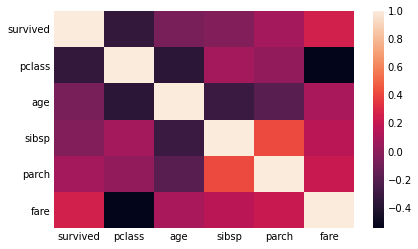

In [64]:
# Use Seaborn to plot a correlation heat map

sns.heatmap(titanic.corr());

#### Take a closer look at the survived and fare variables using a scatter plot:

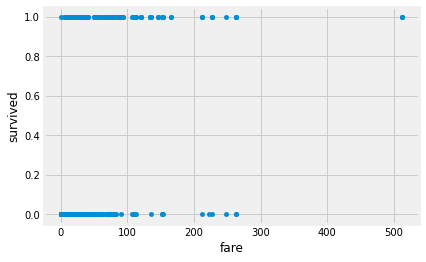

In [65]:
titanic.plot(kind='scatter', x ='fare', y = 'survived');



Is correlation a good way to inspect the association of fare and survival?

<a id="the-normal-distribution"></a>
## <font style = 'color:blue'>f) The Normal Distribution</font>
---

- **Objective:** Identify a normal distribution within a data set using summary statistics and data visualizations.

###  Math Review
- What is an event space? Answer: A listing of all possible occurrences.
- What is a probability distribution? Answer: A function that describes how events occur in an event space.
- What are general properties of probability distributions?
  - Answer: All probabilities of an event are between 0 and 1.
  - Answer: The probability that something occurs is almost certain, or 1.
  

<a id="what-is-the-normal-distribution"></a>
### <font style = 'color:blue'>i) What is the Normal Distribution?</font>

- Whilst there are many possible distribtions that your data can take, a **normal distribution** is often a key assumption to many models.

- In practice, if the normal distribution assumption is not met, it's not the end of the world. Your model is just less efficient in most cases.



- The normal distribution is characterized by its mean and standard deviation:
    - The mean determines the center of the distribution.
    - The standard deviation determines the height and width of the distribution.  When the standard deviation is large, the curve is short and wide, whereas when it is small, the curve is tall and narrow.



- Normal distributions are symmetric, bell-shaped curves.

<br />



![normal distribution](assets/images/normal.png)


#### Why do we care about normal distributions?

- They often show up in nature, for phenomena that are driven by large numnbers of small influences (e.g. height and weight)
- Aggregated processes tend to distribute normally, regardless of their underlying distribution — provided that the processes are uncorrelated or weakly correlated (this is known as the Central Limit Theorem).
- They offer effective simplification that makes it easy to make approximations.

#### Plot a histogram of 1,000 samples from a random normal distribution:

The `np.random.randn(numsamples)` function will draw from a random normal distribution with a mean of 0 and a standard deviation of 1.

- To plot a histogram, pass a NumPy array with 1000 samples as the only parameter to `plt.hist()`.
- Change the number of bins using the keyword argument `bins`, e.g. `plt.hist(mydata, bins=50)`
- The higher the value of samples, the closer to a normal distribution it will appear

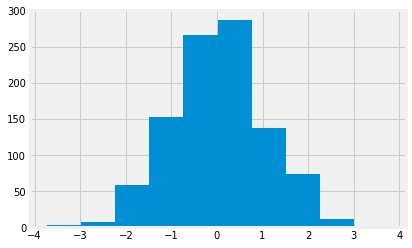

In [66]:
# Plot a histogram of several random normal samples from NumPy.

data = np.random.randn(1000)

plt.hist(data, bins = 10);

One of the key takeaways from histograms is that they show the proportion of the population for any given category.  This is also the probability of any given data point being in that category.

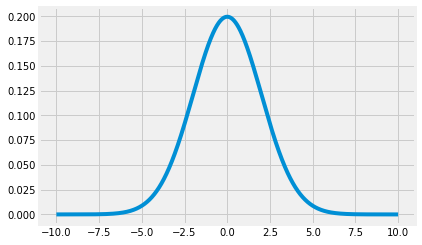

In [67]:
# Create an example a normal distribution (which shows probability on the y axis, rather than frequency)

from scipy.stats import norm

# Plot between -10 and 10 with .001 steps.
x_axis = np.arange(-10, 10, 0.001)
# Mean = 0, SD = 2.
plt.plot(x_axis, norm.pdf(x_axis,0,2))
plt.show()

<a id="skewness"></a>
### <font style = 'color:blue'>ii) Skewness</font>
- Skewness is a measure of the asymmetry of the distribution of a random variable about its mean.
- Skewness can be positive or negative, or even undefined.
- Notice that the mean, median, and mode are the same when there is no skew.

![skewness](assets/images/skewness---mean-median-mode.jpg)

####  Real World Application: When mindfullness beats complexity
- Skewness is surprisingly important
- Most algorithms implicitly use the mean by default when making approximations
- If you know your data is heavily skewed, you may have to either transform your data or set your algorithms to work with the median

<a id="kurtosis"></a>
### <font style = 'color:blue'>iii) Kurtosis</font>
- Kurtosis is a measure of whether the data are peaked or flat, relative to a normal distribution
- Data sets with high kurtosis tend to have a distinct peak near the mean, decline rather rapidly, and have heavy tails

![kurtosis](assets/images/kurtosis.jpg)

####  Real-World Application: Risk Analysis
- Long-tailed distributions with high kurtosis elude intuition; we naturally think the event is too improbable to pay attention to.
- It's often the case that there is a large cost associated with a low-probability event, as is the case with hurricane damage.
- It's unlikely you will get hit by a Category 5 hurricane, but when you do, the damage will be catastrophic.
- Pay attention to what happens at the tails and whether this influences the problem at hand.
- In these cases, understanding the costs may be more important than understanding the risks.

<a id="determining-the-distribution-of-your-data"></a>
## <font style = 'color:blue'>g) Determining the Distribution of Your Data</font>
---

**Objective:** Show basic data visualizations, including scatterplots, box plots, and histograms.

![](./assets/images/distributions.png)

#### Use the `.hist()` function of your Titantic DataFrame to plot histograms of all the variables in your data.

- The function `plt.hist(data)` calls the Matplotlib library directly.
- However, each DataFrame has its own `hist()` method that by default plots one histogram per column. 
- Given a DataFrame `my_df`, it can be called like this: `my_df.hist()`. 

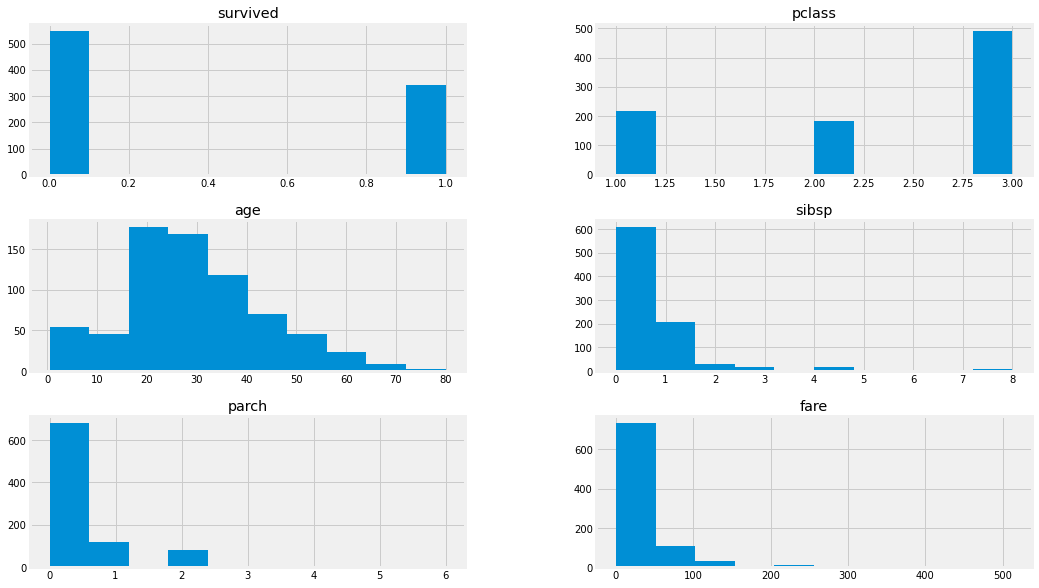

In [68]:
# Plot all variables in the Titanic data set using histograms:

ax = titanic.hist(figsize=(16,10));

#### Use the built-in `.plot.box()` function of your Titanic DataFrame to plot box plots of your variables.

- Given a DataFrame, a box plot can be made where each column is one tick on the x axis.
- To do this, it can be called like this: `my_df.plot.box()`.
- Try using the keyword argument `showfliers`, e.g. `showfliers=False`.

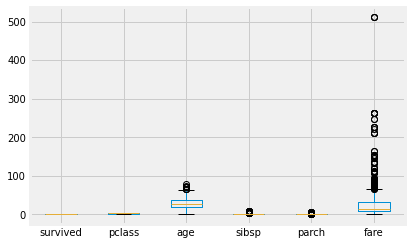

In [69]:
# Plotting all histograms can be unwieldly; box plots can be more concise

titanic.plot.box();

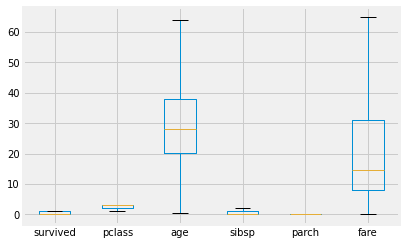

In [70]:
titanic.plot.box(showfliers=False);

<a id="exercise"></a>
### <font style = 'color:green'>i) Exercise</font>

1. Look at the Titanic data variables.
- Are any of them normal?
- Are any skewed?
- How might this affect our modeling?

![](./assets/images/visualization_flow_chart.jpg)

<a id="topic-review"></a>
## <font style = 'color:blue'>h) Lesson Review</font>
---

- We covered several different types of summary statistics, what are they?
- We covered three different types of visualizations, which ones?
- Describe bias and variance and why they are important.
- What are some important characteristics of distributions?

**Any further questions?**

<a id="resources"></a>
## <font style = 'color:blue'>j) Additional resources</font>

#### Linear Algebra
---

+ [A gentle introduction to Linear Algebra](https://machinelearningmastery.com/gentle-introduction-linear-algebra/)
+ For a surprisingly comprehensive (yet dense!) review, be sure to check out [Linear algebra in four pages](./assets/Linear-Algebra-In-4-Pages.pdf)
+ This [deck](http://cseweb.ucsd.edu/classes/wi05/cse252a/linear_algebra_review.pdf) provides great insight into linear operations and advanced geometric topics
+ Stanford's Review and Reference [26-page](http://cs229.stanford.edu/section/cs229-linalg.pdf) guide provides a nice review
+ Spend some time on [Khan Academy](https://www.khanacademy.org/math/linear-algebra/matrix-transformations#concept-intro)!
+ <font style='color:red'>**NumPy**</font>: review the NumPy operations and try out their examples [here]( http://docs.scipy.org/doc/numpy/reference/routines.linalg.html), or visit the [starting page](https://numpy.org/doc/stable/user/absolute_beginners.html) of NumPy

#### Statistics
---

+ [The Art of Statistics](https://www.penguin.co.uk/books/294/294857/learning-from-data/9780241258767.html): brilliant book by an esteemed Stats Professor explaining the core ideas of statistics (Normal Distribution, Central Limit Theory, Regression, p-values etc) using very few equations.
+ [Khan Academy](https://www.khanacademy.org/math/statistics-probability) (again)
+ [Deeper definition of the Normal Distribution](https://www.khanacademy.org/math/statistics-probability/modeling-distributions-of-data/more-on-normal-distributions/v/introduction-to-the-normal-distribution)


